# Regression techniques

In [510]:
import numpy as np

# Needed for plotting
import matplotlib.pyplot as plt
import seaborn as sb

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for coding
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline
%config IPCompleter.use_jedi = False

In [604]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [377]:
#set seeds to reproduce Random results
seed = 7
rand_state = 7

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')

## Univariate regression on synthetic data

In [385]:
rand = np.random.RandomState(rand_state)
def create_data_set(f, noise_level, size, ax= None):
    tr = 20
    X = np.linspace(-tr, tr, size)
    noise = rand.normal(0, noise_level, X.size)
    y = f(X) + noise
    sb.scatterplot(x= X, y = y, ax = ax);
    plt.xlabel("x")
    plt.ylabel("y")
    return X, y

In [431]:
N = 500
f_1 = lambda x: x*np.sin(x) + 2*x
f_2 = lambda x: 10*np.sin(x) + x**2
f_3 = lambda x: np.sign(x)*(x**2 + 300) + 20*np.sin(x)

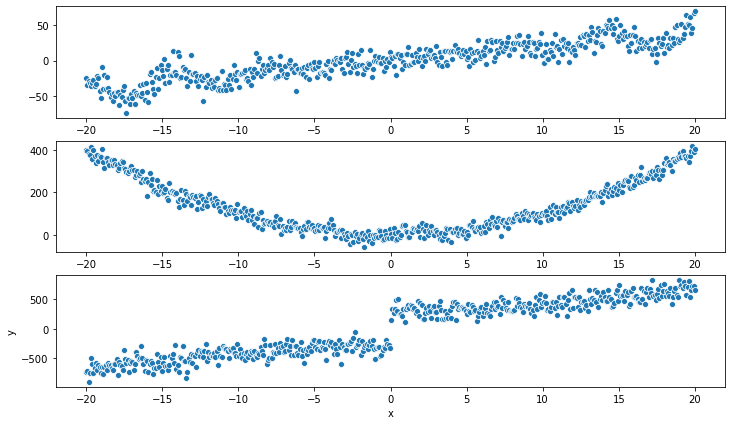

In [512]:
funcs = [f_1, f_2, f_3]
noise = [10, 20, 100]
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(12,7))
i = 0
for f, noise in zip(funcs, noise):
    create_data_set(f, noise_level= noise, size= N, ax = ax[i])
    i += 1

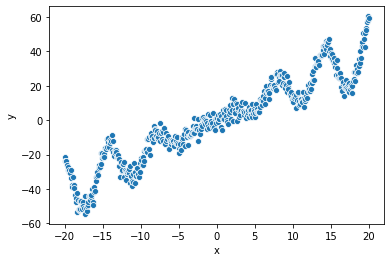

In [579]:
X, y = create_data_set(f_1, noise_level= 3, size= N)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= rand_state, shuffle = True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [580]:
def model_evalutation(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rep = f"""
    Model R2 score: {r2:.2f}
    Model MSE: {mse:.2f}
    Model MAE: {mae:.2f}
    """
    print(rep)

### Ordinary least squares Linear Regression.


    Model R2 score: 0.87
    Model MSE: 77.21
    Model MAE: 6.94
    


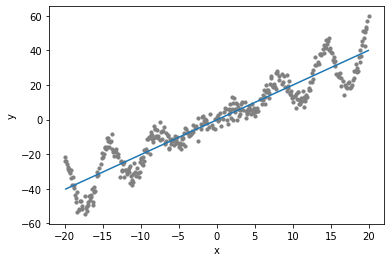

In [581]:
reg = LinearRegression()
reg.fit(X_train[:, np.newaxis], y_train)
y_pred = reg.predict(X_test[:, np.newaxis])
model_evalutation(y_test, y_pred)
# Plots
plt.scatter(X_train, y_train, s= 10, color = "grey")
plt.plot(X_test, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Polynomial Regression

In [582]:
Poly = ("Poly", PolynomialFeatures(5))
LR = ("Linear_reg", LinearRegression())
poly_reg = Pipeline([Poly, LR])


    Model R2 score: 0.87
    Model MSE: 78.49
    Model MAE: 7.10
    


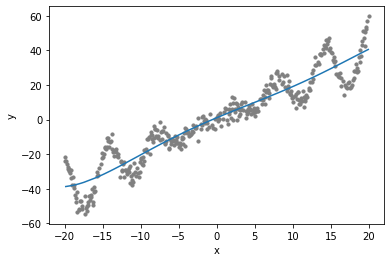

In [583]:
poly_reg.fit(X_train[:, np.newaxis], y_train)
y_pred = poly_reg.predict(X_test[:, np.newaxis])
model_evalutation(y_test, y_pred)
# Plots
plt.scatter(X_train, y_train, s= 10, color = "grey")
plt.plot(X_test, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Random Forest Regression


    Model r2 score is: 0.97
    Model MSE: 15.04
    Model MAE: 3.09
    


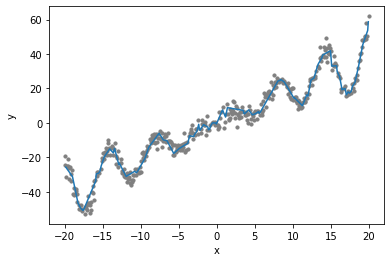

In [532]:
reg = RandomForestRegressor()
reg.fit(X_train[:, np.newaxis], y_train)
y_pred = reg.predict(X_test[:, np.newaxis])
model_evalutation(y_test, y_pred)
# Plots
plt.scatter(X_train, y_train, s= 10, color = "grey")
plt.plot(X_test, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Multivariate regression on synthetic data

In [588]:
X, y, c = dt.make_regression(n_samples= 2000, n_features= 20, n_informative= 10, noise= 10, random_state= rand_state, shuffle= True, coef= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= rand_state)

### Ordinary least squares Linear Regression.

In [603]:
models = [
    ("Linear Regressor", LinearRegression()),
    ("RandomForest Regressor", RandomForestRegressor()),
    ("Polynomial Regressor", Pipeline([Poly, LR])),
    ("Polynomial Lasso Regressor", make_pipeline(PolynomialFeatures(5), Lasso(alpha= 0.5, tol = 0.1)))
]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name+":")
    model_evalutation(y_test, y_pred)

Linear Regressor:

    Model R2 score: 1.00
    Model MSE: 97.96
    Model MAE: 7.90
    
RandomForest Regressor:

    Model R2 score: 0.86
    Model MSE: 4368.06
    Model MAE: 49.61
    
Polynomial Regressor:

    Model R2 score: -0.39
    Model MSE: 42280.71
    Model MAE: 106.32
    
Polynomial Lasso Regressor:

    Model R2 score: 1.00
    Model MSE: 149.24
    Model MAE: 9.56
    


In [590]:
c.size

20

In [593]:
mask = c != 0
np.arange(1,21)[mask]

array([ 3,  4,  5,  8, 10, 12, 14, 16, 17, 19])

In [611]:
param_grid = {'polynomialfeatures__degree':list(range(2,5,2)), 
              'lasso__alpha':[1e-2, 0.1, 1]}

In [612]:
reg = make_pipeline(PolynomialFeatures(), Lasso(tol=0.1))
gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=3)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso(tol=0.1))]),
             param_grid={'lasso__alpha': [0.01, 0.1, 1],
                         'polynomialfeatures__degree': [2, 4]},
             scoring='r2')

In [616]:
gridsearch.best_score_, gridsearch.best_params_

(0.9962333365360109, {'lasso__alpha': 1, 'polynomialfeatures__degree': 2})

In [617]:
final_model = gridsearch.best_estimator_
y_pred = final_model.predict(X_test)
model_evalutation(y_test, y_pred)


    Model R2 score: 1.00
    Model MSE: 103.25
    Model MAE: 8.21
    
